### ENIT 2024-2025
# Prédiction des maladies du foie: Classification
### Élève ingénieur : Lekehal Hammada
### Classe : 3AGI1+NePRev

## Type de problème 
***Il s'agit d'un problème de classification binaire, où, à partir des caractéristiques des patients, nous devons prédire si un patient est atteint d'une maladie du foie ou non.***

# 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
#Metrique de classification binaire
from sklearn.metrics import confusion_matrix, accuracy_score, \
recall_score, precision_score, f1_score
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance 

# 2. Importing the data

In [2]:
df=pd.read_csv("C:\\Users\\Youba\\Downloads\\indian_liver_patient.csv")

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


**Dataset**, c'est-à-dire la valeur de sortie, a *'1'* pour les maladies du foie et *'2'* pour l'absence de maladie du foie. Transformons-le en *'0'* pour l'absence de maladie afin de le rendre plus pratique.

In [6]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## 3. Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


On a une seulle variable categorique **Gender**.
La variable **Albumin_and_Globulin_Ratio** possede des valeurs manquantes.

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


### 3.1 Numerical Feature Analysis

In [9]:
### Understanding the distribution of the numerical column

def diagnostic_plots(df, variable):
    plt.figure(figsize = (16, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.ylabel('Variable quantiles')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

#### 3.1.1 Numerical variable -Age

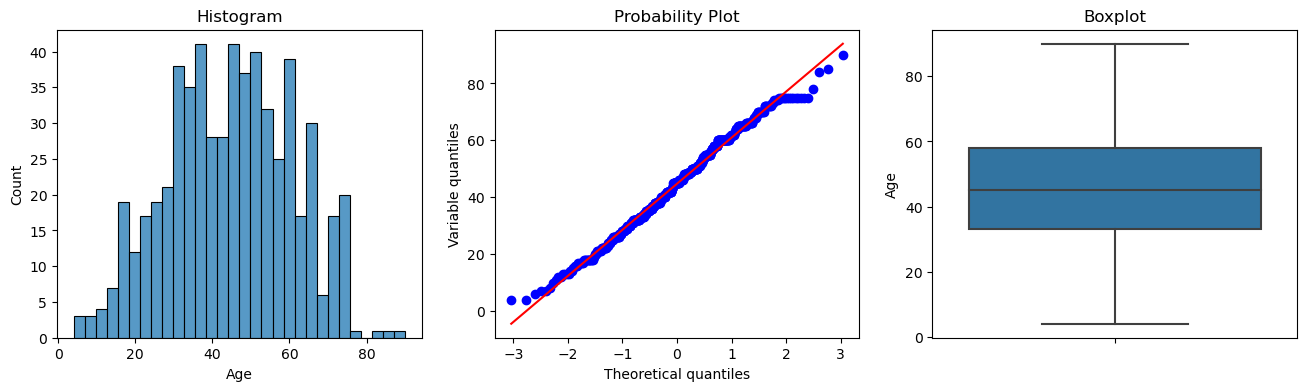

In [10]:
diagnostic_plots(df, 'Age')

On observe qu'il n'y a pas de valeurs aberrantes, et que l'**âge** suit une distribution proche de la normale.

#### 3.1.2 Numerical variable -Total_Bilirubin

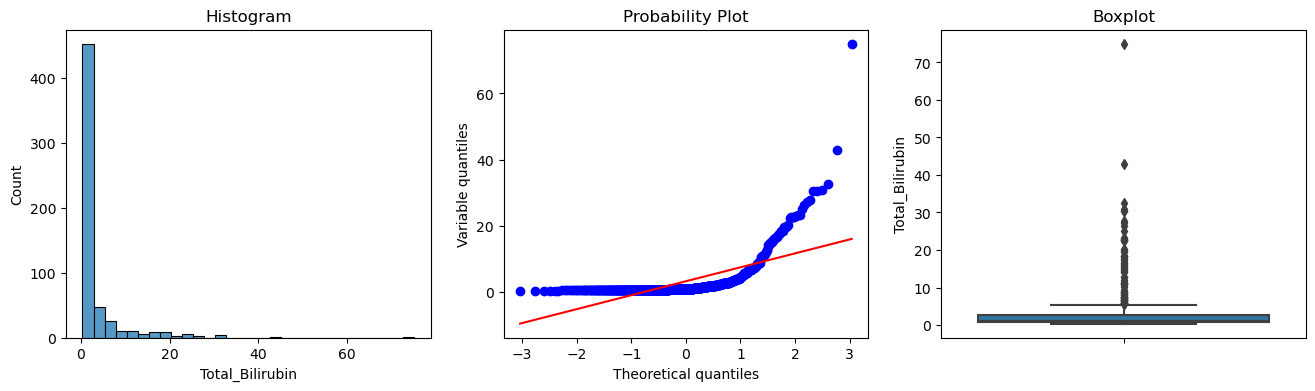

In [11]:
diagnostic_plots(df, 'Total_Bilirubin')

On observe la présence de valeurs aberrantes, et la distribution de **Total_Bilirubin** s'éloigne significativement d'une distribution normale.

#### 3.1.3 Numerical variable -Direct_Bilirubin

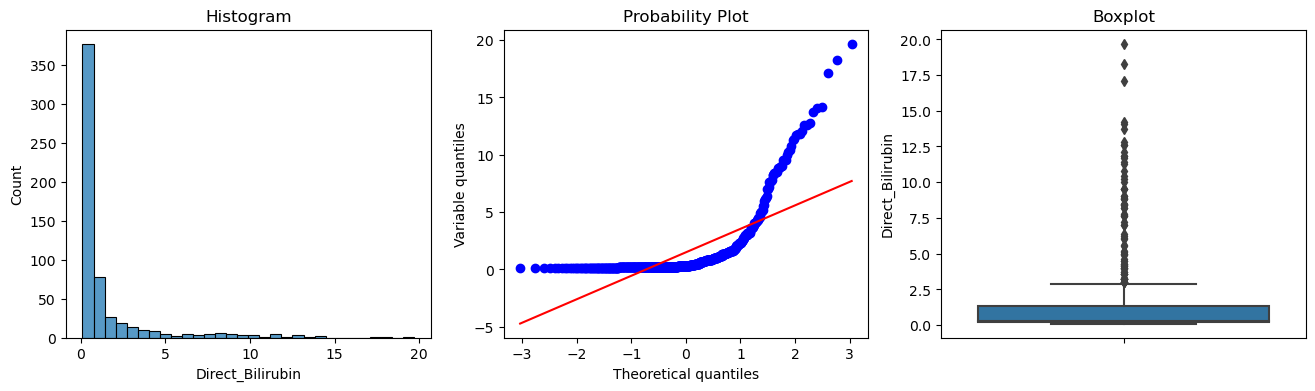

In [12]:
diagnostic_plots(df, 'Direct_Bilirubin')

On observe la présence de valeurs aberrantes, et la distribution de **Direct_Bilirubin** s'éloigne significativement d'une distribution normale.

#### 3.1.4 Numerical variable -Alkaline_Phosphotase

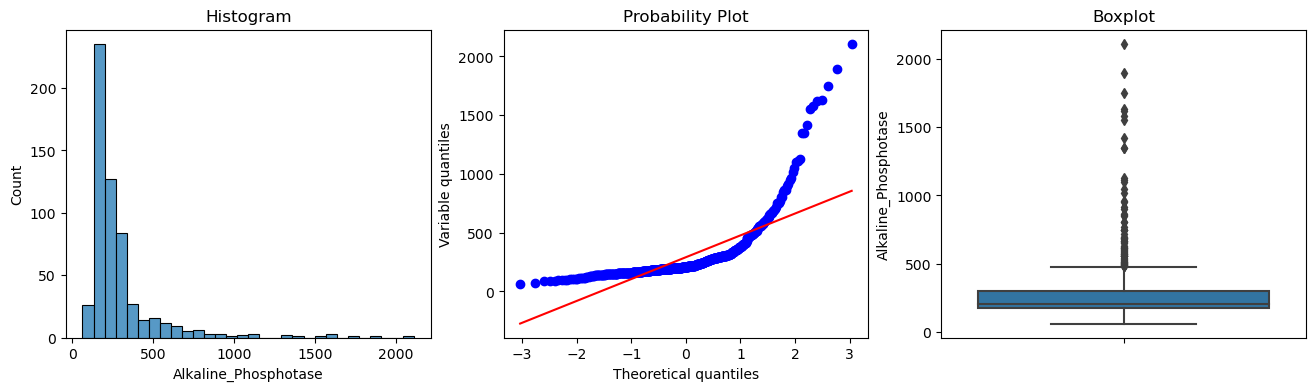

In [13]:
diagnostic_plots(df, 'Alkaline_Phosphotase')

On observe la présence de valeurs aberrantes, et la distribution de **Alkaline_Phosphotase** s'éloigne significativement d'une distribution normale.

#### 3.1.5 Numerical variable -Alamine_Aminotransferase

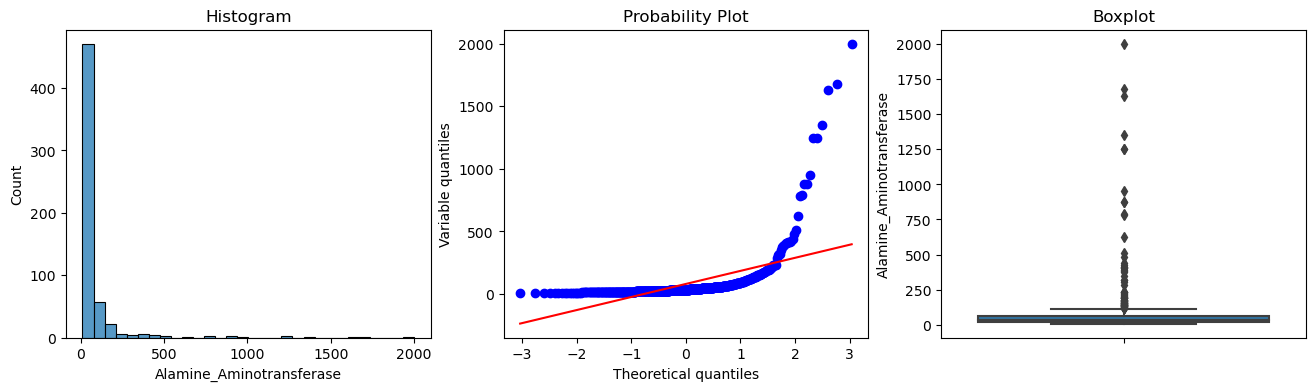

In [14]:
diagnostic_plots(df, 'Alamine_Aminotransferase')

On observe la présence de valeurs aberrantes, et la distribution de **Alamine_Aminotransferase** s'éloigne significativement d'une distribution normale.

#### 3.1.6 Numerical variable -Total_Protiens

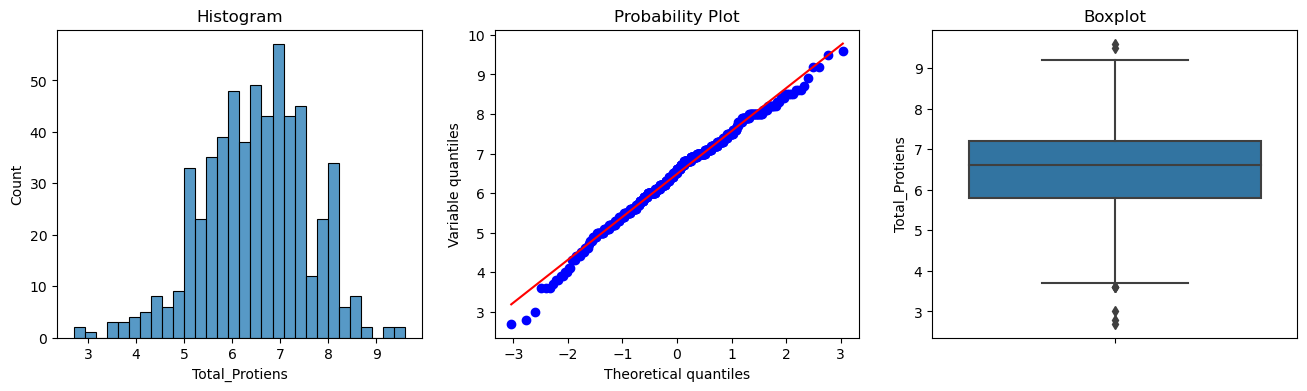

In [15]:
diagnostic_plots(df, 'Total_Protiens')

On observe la présence de valeurs aberrantes,mais la distribution de **Total_Protiens** est proche d'une distribution normale.

#### 3.1.7 Numerical variable -Albumin

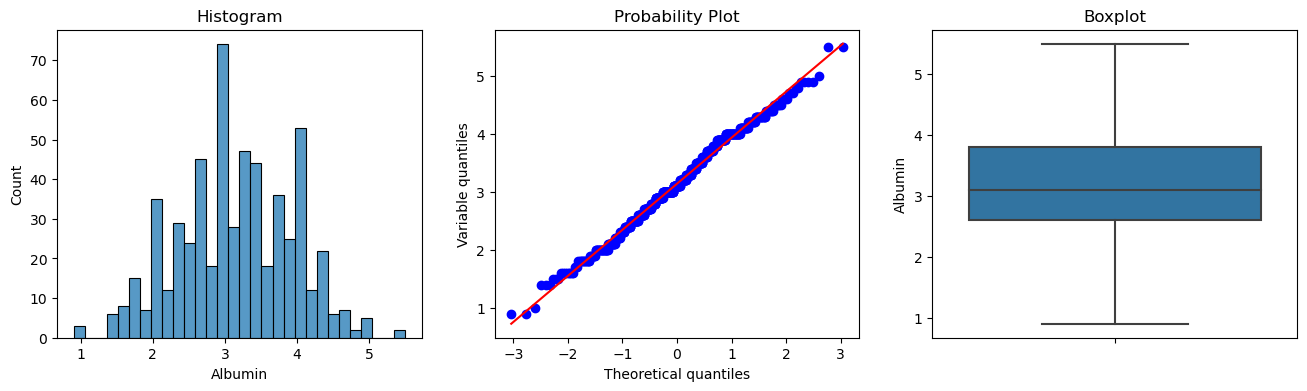

In [16]:
diagnostic_plots(df, 'Albumin')

On observe qu'il n'y a pas de valeurs aberrantes, et que l'**Albumin** suit une distribution proche de la normale.

#### 3.1.8 Numerical variable -Albumin_and_Globulin_Ratio

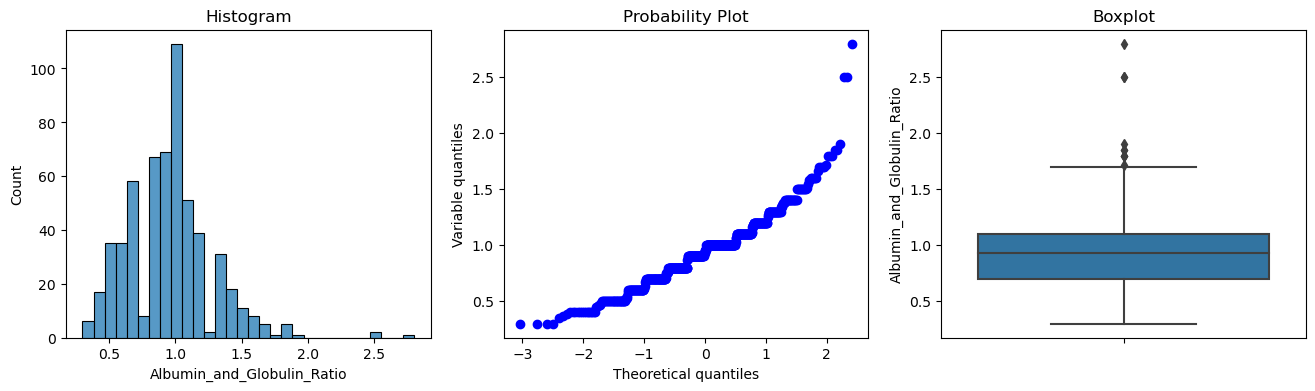

In [17]:
diagnostic_plots(df, 'Albumin_and_Globulin_Ratio')

### 3.2 Categorical Feature Analysis

#### Distribution of categorical data

In [18]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


#### Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

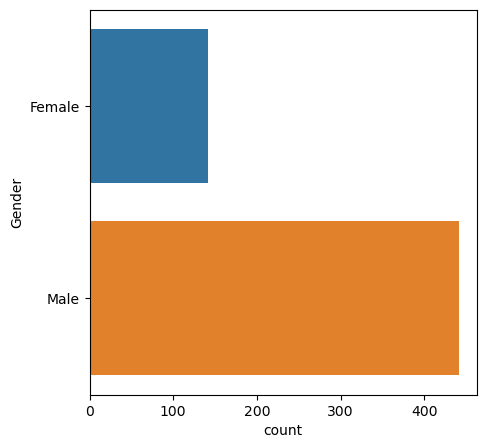

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [20]:
# encodage 
label_encoder = LabelEncoder()

df["Gender"] = label_encoder.fit_transform(df["Gender"])
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### 3.3 Correlations


In [21]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003424,0.082416
Total_Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

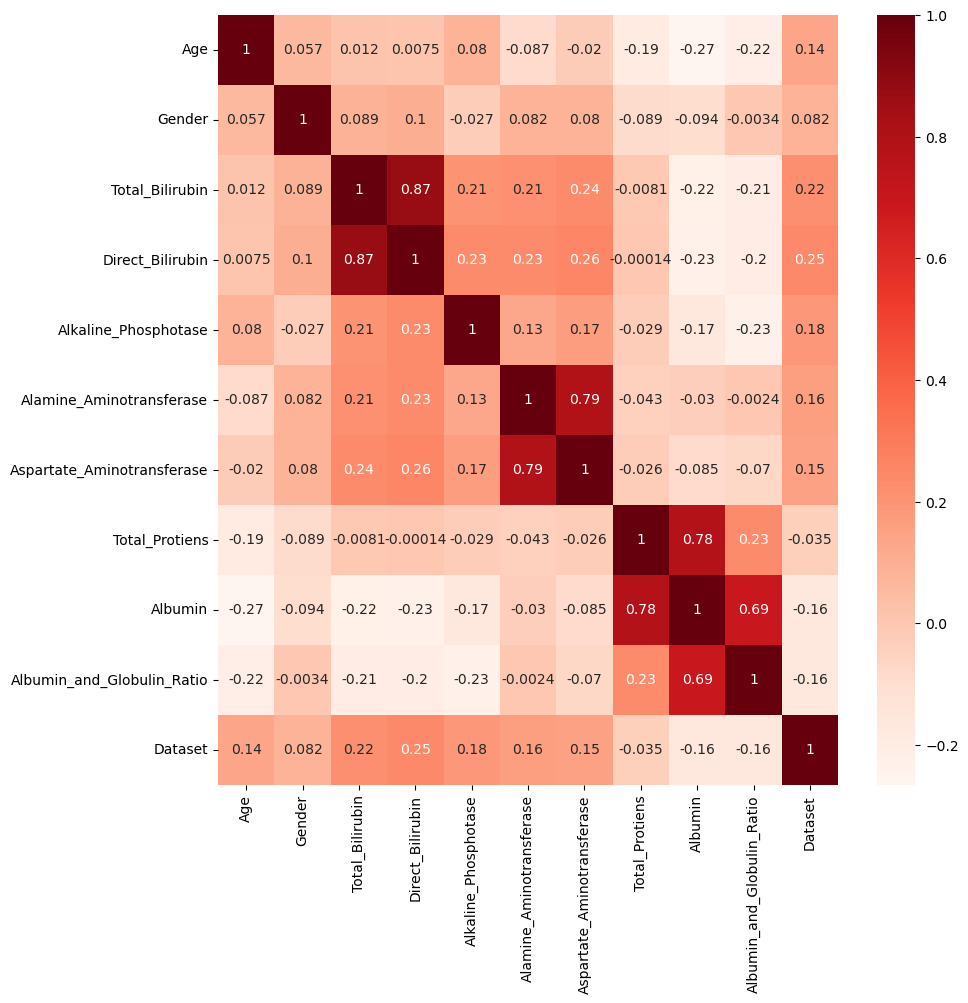

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap='Reds')

## 4. Data Cleaning

### 4.1 Supression des observations dupliquees

In [23]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


Il y avait 13 doublons.

### 4.2.1 Supression des valeurs manquantes

In [24]:
df.isnull().values.any()

True

In [25]:
df=df.dropna(how='any') 

In [26]:
df.shape

(566, 11)

In [27]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


la variable cible est **Dataset** qui prend *1* si le patient est malade et *0* sinon, je vais renommer ce variable **Malade_ou_nom**, pour ameliorer la lisibilite du resultat.

In [28]:
# Renommer une colonne
df.rename(columns={'Dataset': 'Malade_ou_non'}, inplace=True)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Malade_ou_non
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [29]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Malade_ou_non
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,0.756184,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,0.429763,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


## 5.Machine Learning Models

### 5.1 Data Preparation

In [30]:
y = df.Malade_ou_non
X = df.drop('Malade_ou_non', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1234,stratify=df.Malade_ou_non)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(452, 10) (114, 10) (452,) (114,)


### 5.2 Model building

####  5.2.1 Model-1 : Logistic Regression

#### Formation du model

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train), lr.score(X_test,y_test)) #score

0.7212389380530974 0.6929824561403509


#### Evaluation sur l'ensemble d'entrainnement

In [34]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
print("F1 Score :", f1_score(y_train, y_pred_train_lr)) #f1_score
print("Accuracy :", accuracy_score(y_train, y_pred_train_lr))
print("Precision :", precision_score(y_train, y_pred_train_lr))
print("Recall :", recall_score(y_train, y_pred_train_lr))
print("Matrice de confusion :\n", confusion_matrix(y_train, y_pred_train_lr))

F1 Score : 0.8254847645429364
Accuracy : 0.7212389380530974
Precision : 0.7468671679197995
Recall : 0.9226006191950464
Matrice de confusion :
 [[ 28 101]
 [ 25 298]]


#### Evaluation sur l'ensemble de test

In [35]:

print("F1 Score :", f1_score(y_test, y_pred_test_lr)) #f1_score
print("Accuracy :", accuracy_score(y_test, y_pred_test_lr))
print("Precision :", precision_score(y_test, y_pred_test_lr))
print("Recall :", recall_score(y_test, y_pred_test_lr))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_test_lr)) #confusion matrix

F1 Score : 0.8148148148148148
Accuracy : 0.6929824561403509
Precision : 0.7129629629629629
Recall : 0.9506172839506173
Matrice de confusion :
 [[ 2 31]
 [ 4 77]]


#### Parameter tuning

In [36]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
model = GridSearchCV(LogisticRegression(), tuned_params, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [37]:
model.best_estimator_

LogisticRegression(C=100)

In [38]:
## Predict Train set results
y_train_pred = model.predict(X_train)

In [39]:
## Predict Test set results
y_pred = model.predict(X_test)

In [40]:
print("F1 Score :", f1_score(y_test, y_pred )) #f1_score
print("Accuracy :", accuracy_score(y_test, y_pred ))
print("Precision :", precision_score(y_test, y_pred ))
print("Recall :", recall_score(y_test, y_pred ))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred )) #confusion matrix

F1 Score : 0.8085106382978724
Accuracy : 0.6842105263157895
Precision : 0.7102803738317757
Recall : 0.9382716049382716
Matrice de confusion :
 [[ 2 31]
 [ 5 76]]


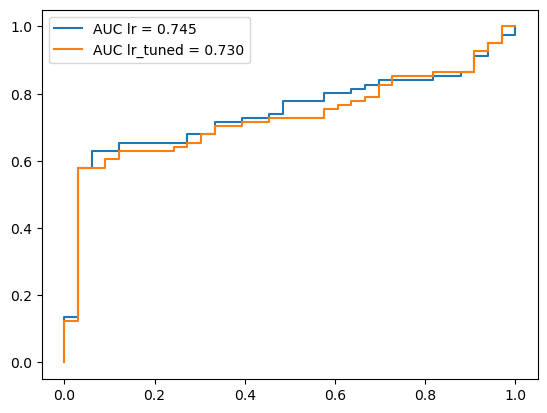

In [41]:
#Roc for classification
from sklearn import metrics
y_pred_test_lr_df = lr.predict_proba(X_test)
y_pred_test_lr_tuned = model.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_lr_df[:,1]) #y_pred_test_lr
fpr2,tpr2,thr2 = metrics.roc_curve(y_test,y_pred_test_lr_tuned[:,1])
auc = metrics.auc(fpr,tpr)
auc2 = metrics.auc(fpr2,tpr2)
plt.plot(fpr,tpr,'-',label = 'AUC lr = %.3f'% auc)
plt.plot(fpr2,tpr2,'-',label = 'AUC lr_tuned = %.3f'% auc2)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_lr_df[:, 1])

#### Feature Importance

In [58]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [59]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Albumin
Direct_Bilirubin
Albumin_and_Globulin_Ratio
Total_Protiens
Gender
Age
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Bilirubin
Alkaline_Phosphotase


#### 5.2.2 Model-2 : Random Forest

In [50]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
rf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [51]:
rf.best_estimator_

RandomForestClassifier(min_samples_leaf=4, n_estimators=300)

In [52]:
y_train_pred = rf.predict(X_train)

In [53]:
y_pred = rf.predict(X_test)

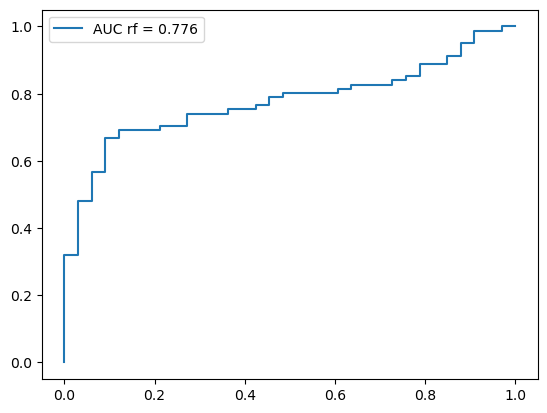

In [54]:
#Roc for classification
from sklearn import metrics
y_pred_test_rf = rf.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_rf[:,1]) #y_pred_test_lr
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'-',label = 'AUC rf = %.3f'% auc)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_rf[:, 1])

#### Feature Importance

In [55]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [56]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Albumin_and_Globulin_Ratio
Total_Protiens
Gender


#### 5.2.3 Model-3 : XGBoost

In [72]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
xgb = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
xgb.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='roc_auc')

In [73]:
xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
y_train_pred = xgb.predict(X_train)

In [75]:
y_pred = xgb.predict(X_test)

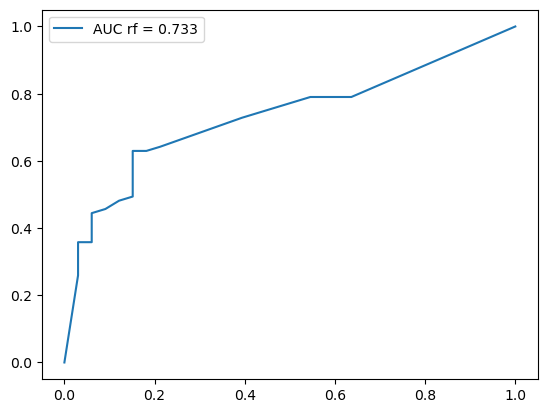

In [76]:
#Roc for classification
from sklearn import metrics
y_pred_test_xgb = xgb.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_xgb[:,1]) #y_pred_test_lr
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'-',label = 'AUC rf = %.3f'% auc)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_xgb[:, 1])

#### Feature Importance

In [77]:
xgb = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

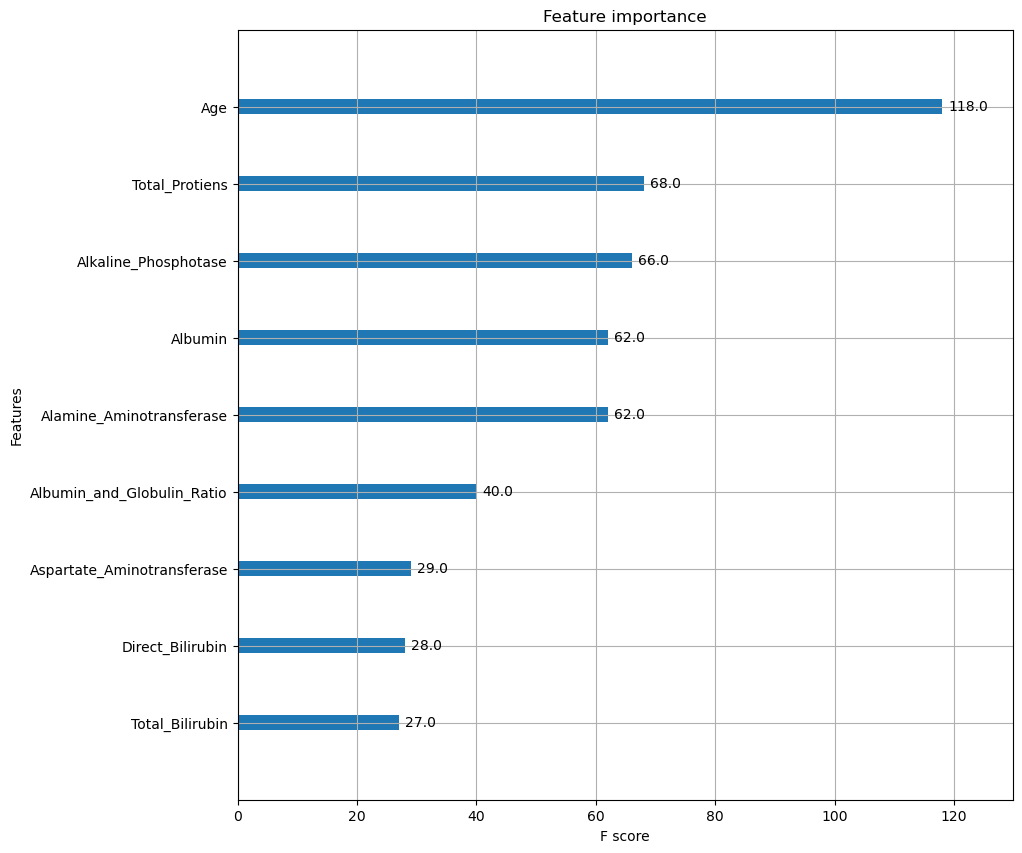

In [80]:
my_plot_importance(xgb, (10,10))

####  5.2.4 Model-4 : KNN

In [81]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 19.


In [82]:
MSE.index(min(MSE))

9

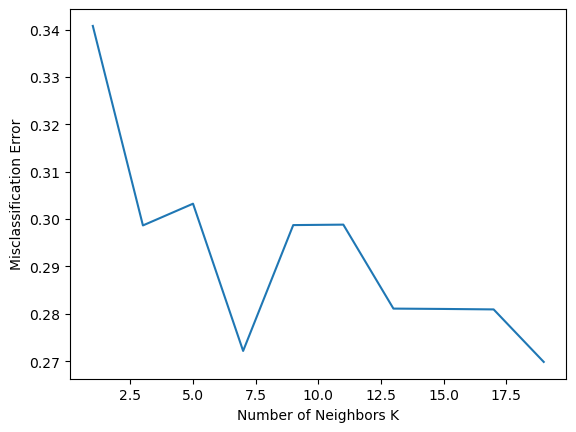

In [83]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [84]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [85]:
y_pred = classifier.predict(X_test)


In [86]:
y_train_pred = classifier.predict(X_train)

In [87]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)  ## get the accuracy on testing data
acc

71.05263157894737

In [88]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 7,  7],
       [26, 74]], dtype=int64)

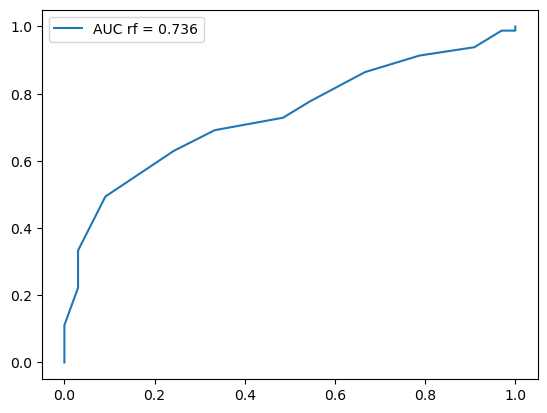

In [95]:
#Roc for classification
from sklearn import metrics
y_pred_test_classifier = classifier.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_classifier[:,1]) #y_pred_test_lr
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'-',label = 'AUC rf = %.3f'% auc)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_classifier[:, 1])

#### 5.2.5 Model-5 : Descision Trees

In [98]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
dt = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
dt.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [99]:
dt.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [100]:
y_train_pred = dt.predict(X_train)

In [101]:
y_pred = dt.predict(X_test)

In [102]:
y_pred_proba = dt.predict_proba(X_test)[:,1]

In [103]:
y_pred_proba[:10]

array([0.54491018, 0.54491018, 0.81395349, 0.81395349, 0.54491018,
       0.54491018, 0.93167702, 0.54491018, 0.93167702, 0.54491018])

In [104]:
confusion_matrix(y_test, y_pred).T

array([[ 2,  6],
       [31, 75]], dtype=int64)

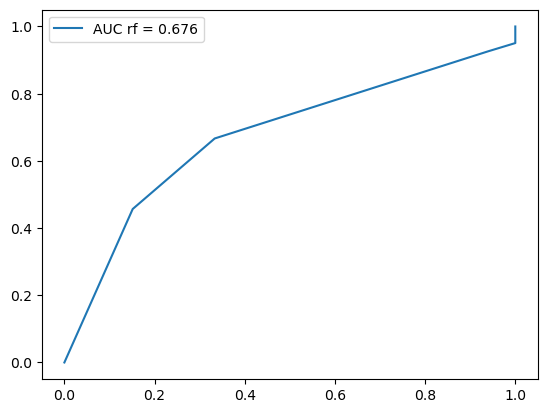

In [105]:
#Roc for classification
from sklearn import metrics
y_pred_test_dt = dt.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_dt[:,1]) #y_pred_test_lr
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'-',label = 'AUC rf = %.3f'% auc)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_dt[:, 1])

#### Feature Importance

In [106]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [107]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Aspartate_Aminotransferase
Direct_Bilirubin
Gender
Alamine_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio


####  5.2.6 Model-6 : SVC

In [108]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [109]:
svClassifier=SVC(kernel='rbf',probability=True)
svClassifier.fit(X_train,y_train)

SVC(probability=True)

In [110]:
svc_param_selection(X_train,y_train,5)

{'C': 10, 'gamma': 0.01}

In [122]:
###### Building the model again with the best hyperparameters
svClassifier = SVC(C=1, gamma=1,probability=True)
svClassifier.fit(X_train, y_train)

SVC(C=1, gamma=1, probability=True)

In [123]:
## Predict Train results
y_train_pred = svClassifier.predict(X_train)

In [124]:
## Predict Test results
y_pred = svClassifier.predict(X_test)

In [125]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [33, 81]], dtype=int64)

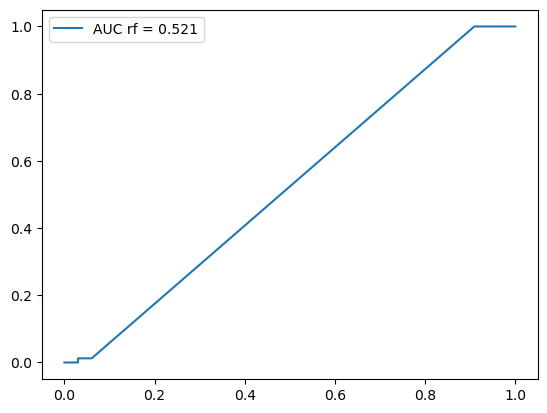

In [126]:
#Roc for classification
from sklearn import metrics
y_pred_test_svc= svClassifier.predict_proba(X_test)
fpr,tpr,thr = metrics.roc_curve(y_test,y_pred_test_svc[:,1]) #y_pred_test_lr
auc = metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,'-',label = 'AUC rf = %.3f'% auc)
plt.legend()
##precision_recall_curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_test_svc[:, 1])

**Remarque :** Il est possible d'optimiser ces modèles, mais étant donné que nous avons déjà réalisé trois notebooks, cela risque de prendre trop de temps.

In [ ]:
#FIN